# FlowNet2 Pytorch

FlowNet2 is a neural network to produce optical flow files from a sequence of images taken as input. In this Colab document, we used a specific version of FlowNet2, which was developed in PyTorch. 

## Setup and Install FlowNet2


### Download compatible Torch version



In [1]:
!pip install torch==1.0.0 torchvision==0.2.2 -f https://download.pytorch.org/whl/cu90/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu90/torch_stable.html
     |████████████████████████████████| 591.8MB 29kB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.0.0 which is incompatible.
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.19.9 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.19.9 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


### Download and setup FlowNet2 files



In [2]:
import os
# get flownet2-pytorch source
!git clone https://github.com/Gauravv97/flownet2-pytorch.git
!mv /content/flownet2-pytorch /content/flownet2pytorch
os.chdir('./flownet2pytorch')
# install custom layers
!bash install.sh

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 572, done.
remote: Total 572 (delta 0), reused 0 (delta 0), pack-reused 572
Receiving objects: 100% (572/572), 6.28 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (323/323), done.
running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.7.11=. -fstack-protector

#### Add packages to IPython system path

In [3]:
import os
os.sys.path.append('/root/.local/lib/python3.6/site-packages/resample2d_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append('/root/.local/lib/python3.6/site-packages/correlation_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append( '/root/.local/lib/python3.6/site-packages/channelnorm_cuda-0.0.0-py3.6-linux-x86_64.egg')

### Download files and Install Packages


In [4]:
!pip install pypng
!pip install tensorboardx
!pip install setproctitle colorama scipy==1.1.0
!pip install tensorflow-addons

     |████████████████████████████████| 655kB 6.9MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp37-none-any.whl size=67179 sha256=6ab2b114db063498e6ff00d08eb7b49d7e251951099f88987ac46dfca09915bc
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng
     |████████████████████████████████| 133kB 7.2MB/s 
     |████████████████████████████████| 31.2MB 96kB/s 
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 686kB 8.1MB/s 


### Download checkpoint of pretrained FlowNet2

In [5]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da',dest_path='./FlowNet2_checkpoint.pth.tar')

### Setup the execution environment

Mount Google Drive 


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Run the optical flow inference

Copy images from the original source (in this case have sequence02) inside the flownet folder. This operation is made necessary because if the dataset stay outside, it isn't possible to execute the consecutive cells.

In [7]:
!cp -avr /content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/ /content/flownet2pytorch/images/

'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/' -> '/content/flownet2pytorch/images/'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003628.png' -> '/content/flownet2pytorch/images/003628.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003642.png' -> '/content/flownet2pytorch/images/003642.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003636.png' -> '/content/flownet2pytorch/images/003636.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003630.png' -> '/content/flownet2pytorch/images/003630.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003660.png' -> '/content/flownet2pytorch/images/003660.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003655.png' -> '/content/flownet2pytorch/images/003655.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003650.png' -> '/content/flownet2pytorch/images/003650.png'
'/content/gdrive/MyDrive/kitti_dataset/sequences/02/rgb/003637.png' -> '/content/flownet2pyt

#### Generate .flo files using FlowNet2

Execute the inference to generate optical flow between every couple of consecutive images in the dataset.

In [8]:
!python main.py --inference --model FlowNet2 --save_flow --save ./output --inference_dataset ImagesFromFolder --inference_dataset_root ./images/ --resume ./FlowNet2_checkpoint.pth.tar

Streaming output truncated to the last 5000 lines.
Inference Averages for Epoch 0: L1: 6.337, EPE: 10.976:  36%|▎| 1663/4660.0 [00:57<01:48, 27.52it/s]
Inference Averages for Epoch 0: L1: 6.337, EPE: 10.976:  36%|▎| 1663/4660.0 [00:57<01:48, 27.52it/s]
Inference Averages for Epoch 0: L1: 6.337, EPE: 10.976:  36%|▎| 1663/4660.0 [00:57<01:48, 27.52it/s]
Inference Averages for Epoch 0: L1: 6.337, EPE: 10.975:  36%|▎| 1664/4660.0 [00:57<01:48, 27.52it/s]
Inference Averages for Epoch 0: L1: 6.336, EPE: 10.974:  36%|▎| 1665/4660.0 [00:58<01:48, 27.52it/s]
Inference Averages for Epoch 0: L1: 6.336, EPE: 10.974:  36%|▎| 1666/4660.0 [00:58<01:48, 27.63it/s]
Inference Averages for Epoch 0: L1: 6.336, EPE: 10.974:  36%|▎| 1666/4660.0 [00:58<01:48, 27.63it/s]
Inference Averages for Epoch 0: L1: 6.336, EPE: 10.974:  36%|▎| 1666/4660.0 [00:58<01:48, 27.63it/s]
Inference Averages for Epoch 0: L1: 6.335, EPE: 10.973:  36%|▎| 1667/4660.0 [00:58<01:48, 27.63it/s]
Inference Averages for Epoch 0: L1: 6.33

## Visualizing .flo files

### Install scipy as some tensorflow functionality requires updated scipy

In [9]:
!pip install scipy==1.4.1

     |████████████████████████████████| 26.1MB 116kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


In [10]:
os.chdir('/content/flownet2pytorch')

#### Define show_flow() for visualization

Definition for all function necessary to convert the optical flow generated in a image.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN_FLOW_THRESH = 1e7

#### Read flow 

Read optical flow from .flo file

**param** filename: name of the flow file

**return** optical flow data in matrix


In [12]:
def read_flow(filename):
    f = open(filename, 'rb')
    magic = np.fromfile(f, np.float32, count=1)
    data2d = None

    if 202021.25 != magic:
        print ('Magic number incorrect. Invalid .flo file')
    else:
        w = int(np.fromfile(f, np.int32, count=1)[0])
        h = int(np.fromfile(f, np.int32, count=1)[0])
        #print("Reading %d x %d flo file" % (h, w))
        data2d = np.fromfile(f, np.float32, count=2 * w * h)
        # reshape data into 3D array (columns, rows, channels)
        data2d = np.resize(data2d, (h, w, 2))
    f.close()
    return data2d

#### Flow to image

Convert flow into color code image.

**param** flow: optical flow map

**return**: optical flow image in color


In [13]:
def flow_to_image(flow):
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)

#### Compute color

Compute optical flow color map.

**param** u: optical flow horizontal map

**param** v: optical flow vertical map

**return**: optical flow in color code


In [14]:
def compute_color(u, v):

    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img



#### Make color wheel

Generate color wheel according Middlebury color code

**return**: Color wheel


In [15]:
def make_color_wheel():
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel


#### Show flow

Visualize optical flow map using matplotlib.

**param** filename: optical flow file

**return**: None


In [16]:
def show_flow(filename):
    flow = read_flow(filename)
    img = flow_to_image(flow)
    plt.imshow(img)
    plt.show()

### Visualize some images

Visualize some flow to see th resuls of the operation.



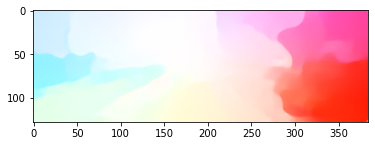

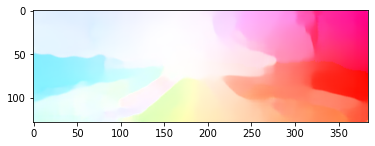

In [17]:
show_flow('/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/000006.flo')

show_flow('/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/000003.flo')

### Save .flow files as images

In [18]:
import os
import PIL.Image
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)


flo_pth='/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/'
flos=[flo_pth + f for f in os.listdir(flo_pth)]
mkdir_ifnotexists('./FlowFrames')
for i in range(len(flos)):
 PIL.Image.fromarray(flow_to_image(read_flow(flos[i]))).save('./FlowFrames/'+os.path.basename(flos[i])+'.png')

### Generate video from .flo files (Optional Section)

This section can be executed only for see the results of previously operations like a video.

In [19]:
os.system('ffmpeg -r 24 -i FlowFrames/%6d.flo.png -vcodec libx264 -b 10M -y FlowVideo.mp4  ')

0

In [20]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/flownet2pytorch/FlowVideo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)